In this notebook, we will demonstrate using Gradient Descent on a simple univariate linear regression problem.

# Imports

In [ ]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

# Sample Data

We will simply use two data points!

In [8]:
x_train = np.array([2.5, 5.0])
y_train = np.array([37.5, 60.0])

# Cost function
The cost function is defined as follows: $J(w,b) = \frac{1}{2m}\sum_{i=0}^{m-1}(f_{(w, b)}(x^{(i)}) - y^{(i)})^2$

In [ ]:
def compute_cost(x, y, w, b):
    m = x.shape[0]  # number of training examples

    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

# Gradient Descent

$$
\text{repeat until convergence:} \left\{
\begin{aligned}
w &= w - \alpha \frac{\partial J(w, b)}{\partial w} \\
b &= b - \alpha \frac{\partial J(w, b)}{\partial b}
\end{aligned}
\right.
$$

where, parameters \( w, b \) are updated simultaneously.

The gradient is defined as:

$$
\frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right) x^{(i)}
$$

$$
\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)
$$

In [ ]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]  # number of training examples

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += f_wb - y[i]

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [10]:
def gradient_descent(
    x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function
):
    J_values = []
    p_values = [] # p for parameters
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        b -= alpha * dj_db
        w -= alpha * dj_dw

        J_values.append(cost_function(x, y, w, b))
        p_values.append([w, b])
        if i % math.ceil(num_iters / 10) == 0:
            print(
                f"Iteration {i:4}: Cost {J_values[-1]:0.2e} ",
                f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                f"w: {w: 0.3e}, b:{b: 0.5e}",
            )

    return w, b, J_values, p_values

In [13]:
# initialize parameters
w_init = 0
b_init = 0
iterations = 10000
alpha = 1.0e-2  # learning_rate

w_final, b_final, J_values, p_values = gradient_descent(
    x_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient
)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 8.74e+02  dj_dw: -1.969e+02, dj_db: -4.875e+01   w:  1.969e+00, b: 4.87500e-01
Iteration 1000: Cost 1.11e+00  dj_dw:  1.074e-01, dj_db: -4.450e-01   w:  1.014e+01, b: 1.02967e+01
Iteration 2000: Cost 1.67e-01  dj_dw:  4.173e-02, dj_db: -1.728e-01   w:  9.441e+00, b: 1.31732e+01
Iteration 3000: Cost 2.52e-02  dj_dw:  1.621e-02, dj_db: -6.713e-02   w:  9.171e+00, b: 1.42904e+01
Iteration 4000: Cost 3.80e-03  dj_dw:  6.296e-03, dj_db: -2.608e-02   w:  9.067e+00, b: 1.47244e+01
Iteration 5000: Cost 5.73e-04  dj_dw:  2.446e-03, dj_db: -1.013e-02   w:  9.026e+00, b: 1.48929e+01
Iteration 6000: Cost 8.65e-05  dj_dw:  9.499e-04, dj_db: -3.934e-03   w:  9.010e+00, b: 1.49584e+01
Iteration 7000: Cost 1.30e-05  dj_dw:  3.690e-04, dj_db: -1.528e-03   w:  9.004e+00, b: 1.49838e+01
Iteration 8000: Cost 1.97e-06  dj_dw:  1.433e-04, dj_db: -5.935e-04   w:  9.002e+00, b: 1.49937e+01
Iteration 9000: Cost 2.97e-07  dj_dw:  5.567e-05, dj_db: -2.305e-04   w:  9.001e+00, b: 1.49976e+01


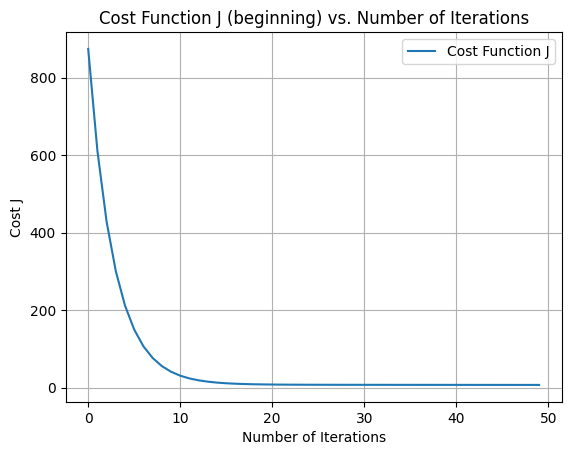

In [18]:
plt.plot(range(iterations)[:50], J_values[:50], label="Cost Function J")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost J")
plt.title("Cost Function J (beginning) vs. Number of Iterations")
plt.legend()
plt.grid(True)
plt.show()

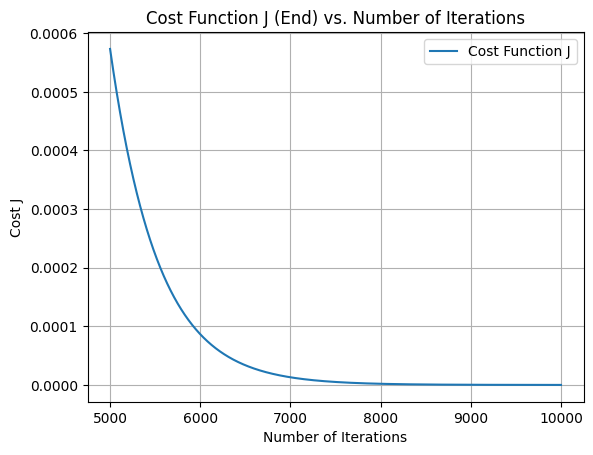

In [23]:
plt.plot(range(iterations)[-5000:], J_values[-5000:], label="Cost Function J")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost J")
plt.title("Cost Function J (End) vs. Number of Iterations")
plt.legend()
plt.grid(True)
plt.show()